In [347]:
# i did with the help of tutorials in the internet and our workshops, hope that it will be enough
pip install lightgbm

In [348]:
#logistic reg.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import neighbors
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [349]:
insurance = pd.read_csv("insurance.csv")
df = insurance.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [350]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [351]:
df.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [352]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [354]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [355]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [356]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

<Axes: ylabel='children'>

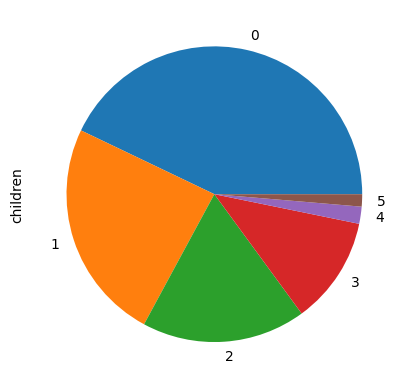

In [357]:
df["children"].value_counts().plot.pie()

<Axes: >

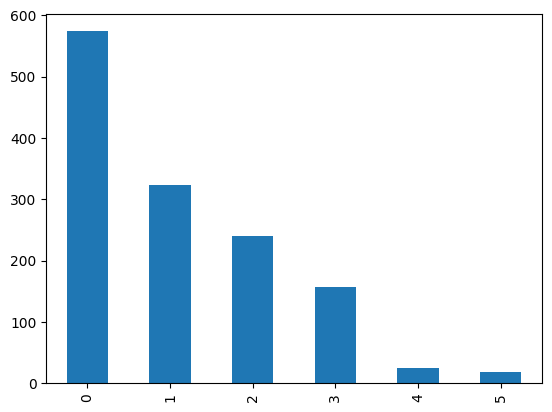

In [358]:
df["children"].value_counts().plot.bar()

<Axes: >

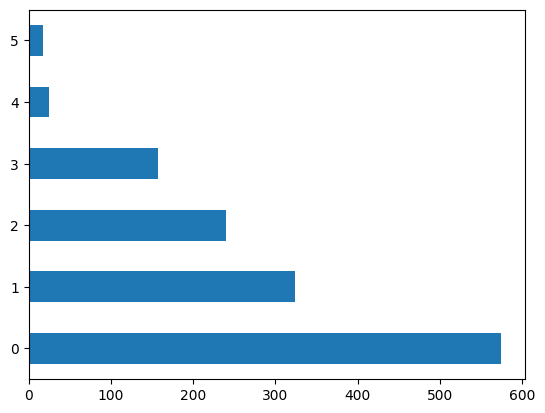

In [359]:
df["children"].value_counts().plot.barh()

In [360]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [361]:
df.sort_values("bmi",ascending=True).head(15)

,age,sex,bmi,children,smoker,region,charges
172,18,male,15.960,0,no,northeast,1694.79640
428,21,female,16.815,1,no,northeast,3167.45585
1226,38,male,16.815,2,no,northeast,6640.54485
412,26,female,17.195,2,yes,northeast,14455.64405
1286,28,female,17.290,0,no,northeast,3732.62510
1029,37,female,17.290,2,no,northeast,6877.98010
250,18,male,17.290,2,yes,northeast,12829.45510
28,23,male,17.385,1,no,northwest,2775.19215
680,21,female,17.400,1,no,southwest,2585.26900
410,19,male,17.480,0,no,northwest,1621.34020


In [362]:
df.sort_values("bmi",ascending=False).head(15)

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,1163.46270
1047,22,male,52.58,1,yes,southeast,44501.39820
847,23,male,50.38,1,no,southeast,2438.05520
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
1088,52,male,47.74,1,no,southeast,9748.91060
860,37,female,47.60,2,yes,southwest,46113.51100
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
438,52,female,46.75,5,no,southeast,12592.53450


In [363]:
df.sort_values("charges",ascending=True).head(15)

,age,sex,bmi,children,smoker,region,charges
940,18,male,23.21,0,no,southeast,1121.8739
808,18,male,30.14,0,no,southeast,1131.5066
1244,18,male,33.33,0,no,southeast,1135.9407
663,18,male,33.66,0,no,southeast,1136.3994
22,18,male,34.10,0,no,southeast,1137.0110
194,18,male,34.43,0,no,southeast,1137.4697
866,18,male,37.29,0,no,southeast,1141.4451
781,18,male,41.14,0,no,southeast,1146.7966
442,18,male,43.01,0,no,southeast,1149.3959
1317,18,male,53.13,0,no,southeast,1163.4627


In [364]:
df.sort_values("charges",ascending=False).head(15)

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
34,28,male,36.400,1,yes,southwest,51194.55914
1241,64,male,36.960,2,yes,southeast,49577.66240
1062,59,male,41.140,1,yes,southeast,48970.24760
488,44,female,38.060,0,yes,southeast,48885.13561


In [365]:
df.groupby("smoker")["charges","age", "bmi"].describe().T

<ipython-input-365-a296ac3a2ea4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("smoker")["charges","age", "bmi"].describe().T


smoker                   no           yes
charges count   1064.000000    274.000000
        mean    8434.268298  32050.231832
        std     5993.781819  11541.547176
        min     1121.873900  12829.455100
        25%     3986.438700  20826.244213
        50%     7345.405300  34456.348450
        75%    11362.887050  41019.207275
        max    36910.608030  63770.428010
age     count   1064.000000    274.000000
        mean      39.385338     38.514599
        std       14.083410     13.923186
        min       18.000000     18.000000
        25%       26.750000     27.000000
        50%       40.000000     38.000000
        75%       52.000000     49.000000
        max       64.000000     64.000000
bmi     count   1064.000000    274.000000
        mean      30.651795     30.708449
        std        6.043111      6.318644
        min       15.960000     17.195000
        25%       26.315000     26.083750
        50%       30.352500     30.447500
        75%       34.430000     35.200000
        max       53.130000     52.580000

In [366]:
df.groupby("region")["charges"].describe().T

region,northeast,northwest,southeast,southwest
count,324.000000,325.000000,364.000000,325.000000
mean,13406.384516,12417.575374,14735.411438,12346.937377
std,11255.803066,11072.276928,13971.098589,11557.179101
min,1694.796400,1621.340200,1121.873900,1241.565000
25%,5194.322288,4719.736550,4440.886200,4751.070000
50%,10057.652025,8965.795750,9294.131950,8798.593000
75%,16687.364100,14711.743800,19526.286900,13462.520000
max,58571.074480,60021.398970,63770.428010,52590.829390


<ipython-input-367-d392ca4f0304>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age);


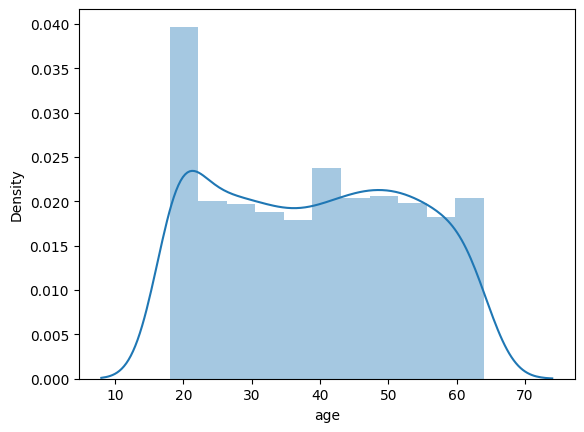

In [367]:
sns.distplot(df.age);


<ipython-input-368-136d2c97b06d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.bmi)


<Axes: xlabel='bmi', ylabel='Density'>

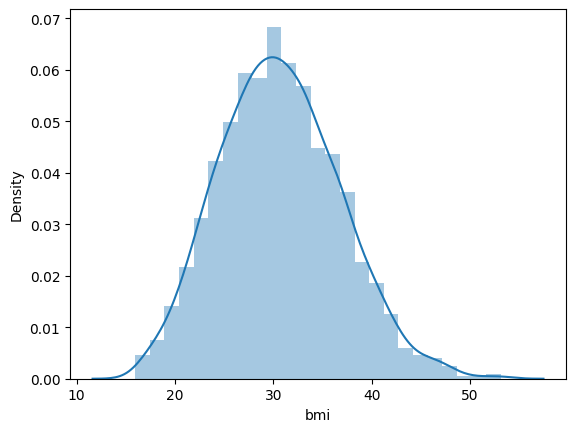

In [368]:
sns.distplot(df.bmi)


<ipython-input-369-7efe117b29bb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.children)


<Axes: xlabel='children', ylabel='Density'>

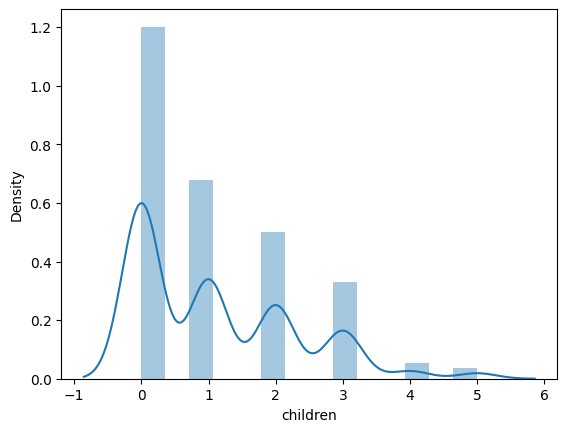

In [369]:
sns.distplot(df.children)


<ipython-input-370-ebc51b32bb29>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.charges)


<Axes: xlabel='charges', ylabel='Density'>

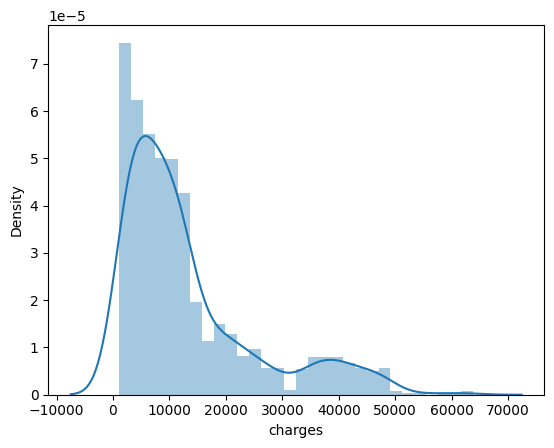

In [370]:
sns.distplot(df.charges)


In [ ]:
def return_rmse_mape_mae(models):
    y_pred=models.predict(X_test)
    rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    mape=metrics.mean_absolute_percentage_error(y_test,y_pred)
    mae=metrics.mean_absolute_error(y_test,y_pred)
    return rmse,mape,mae

In [ ]:
def return_rmse_mape_mae_std_scl(models):
    y_pred=models.predict(X_test_std_scl)
    rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    mape=metrics.mean_absolute_percentage_error(y_test,y_pred)
    mae=metrics.mean_absolute_error(y_test,y_pred)
    return rmse,mape,mae

<Axes: >

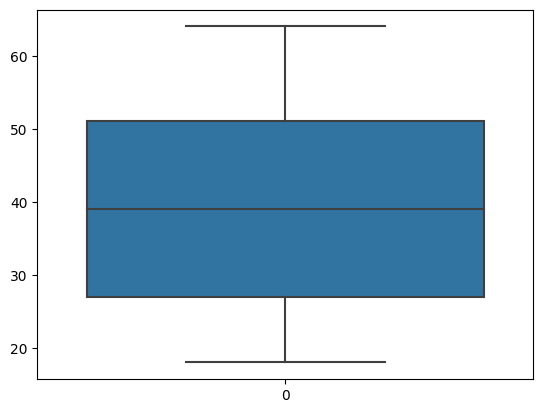

In [371]:
sns.boxplot(df.age)

<Axes: >

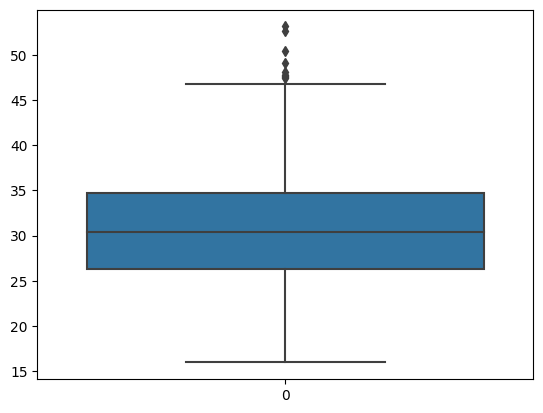

In [372]:
sns.boxplot(df.bmi)

<Axes: >

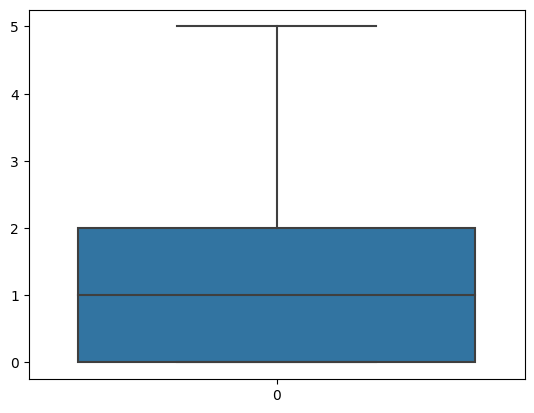

In [373]:
sns.boxplot(df.children)

<Axes: >

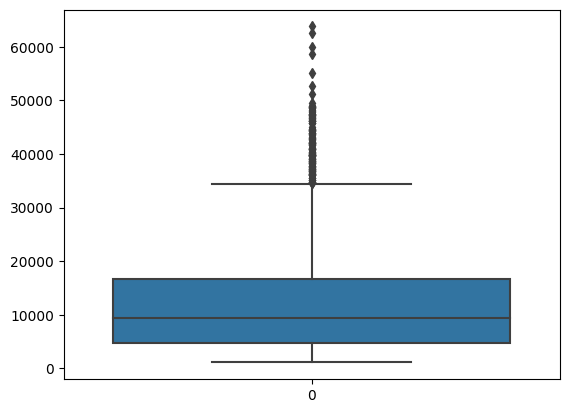

In [374]:
sns.boxplot(df.charges)

In [375]:
#let's define them as a list and easily roam within
#here we find the outlier numerical value category
numerical_values = ['age', 'bmi', 'children', 'charges']
for i in numerical_values:
    q1 = df[i].quantile(0.2)
    q3 = df[i].quantile(0.8)
    iqr = q3-q1
    upper_q = q3 + 1.5*iqr
    lower_q = q1 - 1.5*iqr

    if df[(df[i] > upper_q) | (df[i] < lower_q)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

age no
bmi yes
children no
charges yes


In [376]:
#to remove
for i in numerical_values:
    q1 = df[i].quantile(0.2)
    q3 = df[i].quantile(0.8)
    iqr = q3-q1
    upper_q = q3 + 1.5*iqr
    lower_q = q1 - 1.5*iqr

    df.loc[df[i]>upper_q,i]=upper_q
    df.loc[df[i]<lower_q,i]=lower_q

#lets see the table again
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.000000
bmi,1338.0,30.661612,6.091849,15.9600,26.29625,30.400,34.693750,51.661000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.000000
charges,1338.0,13141.425996,11719.391124,1121.8739,4740.28715,9382.033,16639.912515,44664.202435


If the person is a smoker than it may range but it is high when it is compared to non-smoker people.

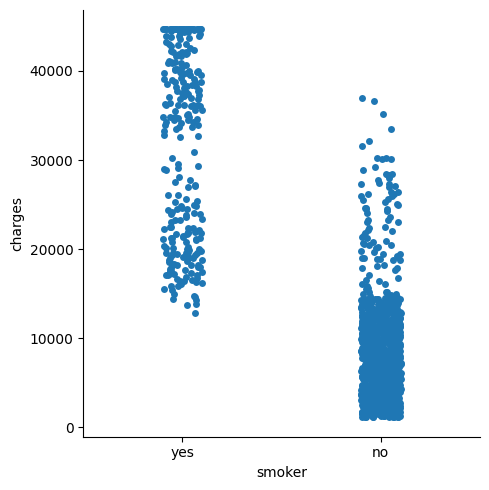

In [377]:
sns.catplot(x="smoker", y="charges", data=df);

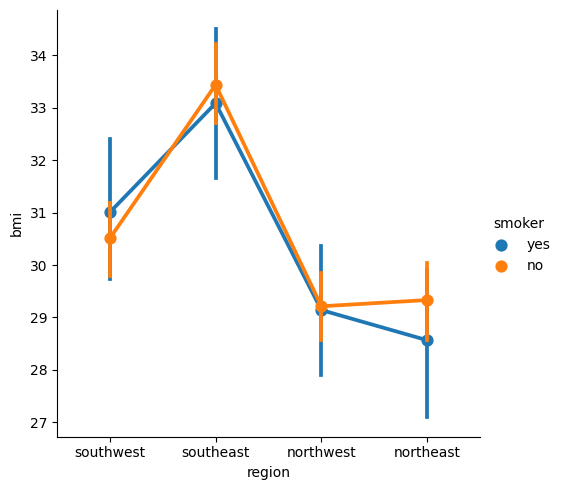

In [378]:
sns.catplot(x="region", y="bmi", hue="smoker", kind="point", data=df)

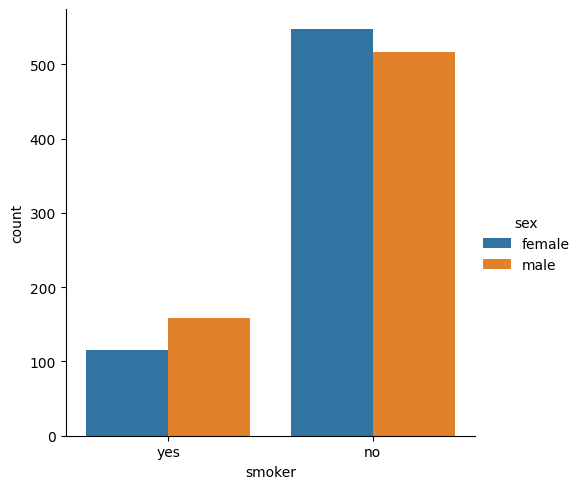

In [379]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=df);

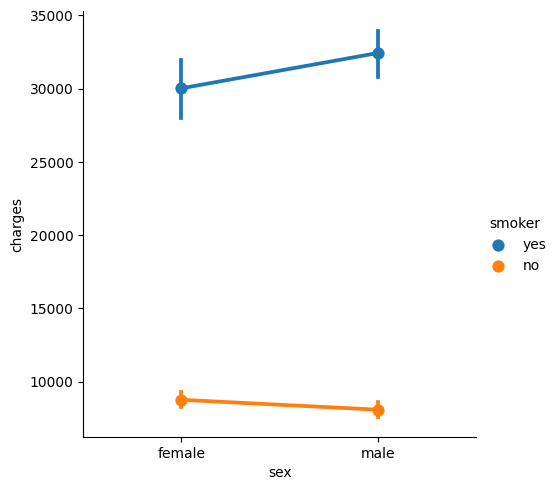

In [380]:
sns.catplot(x="sex", y="charges", hue="smoker",kind="point", data=df);

In [381]:
# categorical values will be using label encoding
le=LabelEncoder()

df["region"]=le.fit_transform(df["region"])
df["sex"]=le.fit_transform(df["sex"])
df["smoker"]=le.fit_transform(df["smoker"])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


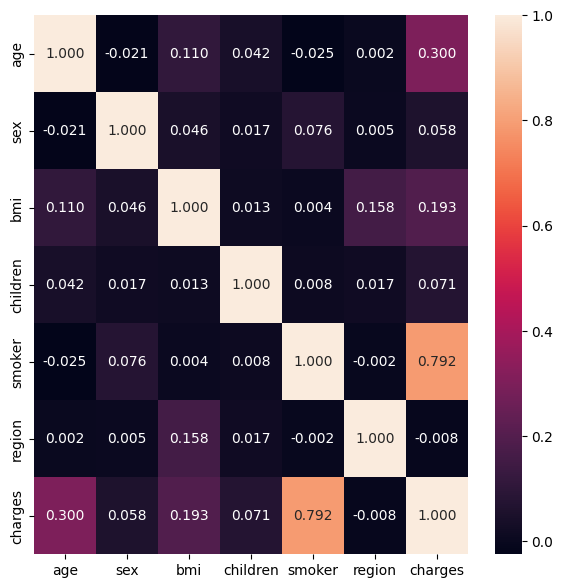

In [382]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,fmt=".3f")
plt.show()

In [383]:
correlation=df.corr()["charges"].sort_values(ascending=False)
pd.DataFrame({"categories":correlation.index,"correlation val. w/ charges":correlation.values})

,categories,correlation val. w/ charges
0,charges,1.000000
1,smoker,0.791793
2,age,0.299981
3,bmi,0.192730
4,children,0.071257
5,sex,0.057952
6,region,-0.008044


In [384]:
X=df.drop("charges",axis=1)
y=df["charges"]
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [385]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [386]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=0)

In [387]:
#now train starts
ridge=Ridge().fit(X_train,y_train)
lasso=Lasso().fit(X_train,y_train)
enet=ElasticNet().fit(X_train,y_train)
dtc=DecisionTreeRegressor().fit(X_train,y_train)
rf=RandomForestRegressor().fit(X_train,y_train)
xgb=XGBRegressor().fit(X_train,y_train)
gbm=GradientBoostingRegressor().fit(X_train,y_train)
lgb=LGBMRegressor().fit(X_train,y_train)
knn=KNeighborsRegressor().fit(X_train,y_train)
ada=AdaBoostRegressor().fit(X_train,y_train)
svm=SVR().fit(X_train,y_train)
mlpc=MLPRegressor().fit(X_train,y_train)
models=[ridge,lasso,enet,knn,ada,svm,mlpc,dtc,rf,xgb,gbm,lgb]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 6
[LightGBM] [Info] Start training from score 13080.670203


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [389]:
#see the rmse mape mae
for model in models:
     print(model,"info: ", return_rmse_mape_mae(model))

Ridge() Succession rate is  (5390.42433494833, 0.3921468759551937, 3789.5054269617935)
Lasso() Succession rate is  (5386.044354160073, 0.3899875001720824, 3776.2509661169556)
ElasticNet() Succession rate is  (9200.427827293683, 0.9177646976105694, 7160.138650174177)
KNeighborsRegressor() Succession rate is  (10725.654020061596, 0.8343158785565414, 7416.4407141417905)
AdaBoostRegressor() Succession rate is  (4726.147894602669, 0.6532005097954867, 3768.081355360933)
SVR() Succession rate is  (12784.931055807527, 0.9734459567073241, 8406.851865215009)
MLPRegressor() Succession rate is  (12054.499121963896, 0.7472490473210008, 7496.962585278027)
DecisionTreeRegressor() Succession rate is  (7014.703746376873, 0.5124306103431556, 3599.3444059850744)
RandomForestRegressor() Succession rate is  (4174.883494618463, 0.33940864855697156, 2501.8091231393055)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsampl

In [390]:
# standart scale:
X_train_std_scl,X_test_std_scl,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=0)
sc=StandardScaler()
X_train2=sc.fit_transform(X_train_std_scl)
X_test2=sc.transform(X_test_std_scl)

In [391]:
X_train2

array([[-0.14853305,  1.01506676,  0.54635376,  2.41394802,  1.97125461,
         1.30906493],
       [-1.49780784,  1.01506676,  0.59978807, -0.89219519, -0.50729114,
         0.40480446],
       [-1.14273553, -0.98515688,  0.96249367,  0.76087642,  1.97125461,
        -1.4037165 ],
       ...,
       [ 0.06451033,  1.01506676, -0.91418397, -0.89219519, -0.50729114,
         0.40480446],
       [-1.42679338,  1.01506676,  0.77790243, -0.89219519, -0.50729114,
        -0.49945602],
       [-0.4325909 , -0.98515688, -1.97963167, -0.06565939, -0.50729114,
         1.30906493]])

In [392]:
ridge_std_scl=Ridge().fit(X_train,y_train)
lasso_std_scl=Lasso().fit(X_train,y_train)
enet_std_scl=ElasticNet().fit(X_train,y_train)
dtc_std_scl=DecisionTreeRegressor().fit(X_train,y_train)
rf_std_scl=RandomForestRegressor().fit(X_train,y_train)
xgb_std_scl=XGBRegressor().fit(X_train,y_train)
gbm_std_scl=GradientBoostingRegressor().fit(X_train,y_train)
lgb_std_scl=LGBMRegressor().fit(X_train,y_train)
knn_std_scl=KNeighborsRegressor().fit(X_train,y_train)
ada_std_scl=AdaBoostRegressor().fit(X_train,y_train)
svm_std_scl=SVR().fit(X_train,y_train)
mlpc_std_scl=MLPRegressor().fit(X_train,y_train)
models_std_scl=[ridge_std_scl,lasso_std_scl,enet_std_scl,knn_std_scl,ada_std_scl,svm_std_scl,mlpc_std_scl,dtc_std_scl,rf_std_scl,xgb_std_scl,gbm_std_scl,lgb]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 6
[LightGBM] [Info] Start training from score 13080.670203


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [394]:
#see the rmse mape mae
for model in models:
     print(model,"info :",return_rmse_mape_mae_std_scl(model))

Ridge() Algorithm succed rate : (5390.42433494833, 0.3921468759551937, 3789.5054269617935)
Lasso() Algorithm succed rate : (5386.044354160073, 0.3899875001720824, 3776.2509661169556)
ElasticNet() Algorithm succed rate : (9200.427827293683, 0.9177646976105694, 7160.138650174177)
KNeighborsRegressor() Algorithm succed rate : (10725.654020061596, 0.8343158785565414, 7416.4407141417905)
AdaBoostRegressor() Algorithm succed rate : (4726.147894602669, 0.6532005097954867, 3768.081355360933)
SVR() Algorithm succed rate : (12784.931055807527, 0.9734459567073241, 8406.851865215009)
MLPRegressor() Algorithm succed rate : (12054.499121963896, 0.7472490473210008, 7496.962585278027)
DecisionTreeRegressor() Algorithm succed rate : (7014.703746376873, 0.5124306103431556, 3599.3444059850744)
RandomForestRegressor() Algorithm succed rate : (4174.883494618463, 0.33940864855697156, 2501.8091231393055)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsampl

In [395]:
gbm_params={
    "learning_rate":[0.1,0.01,0.3,0.03],
    "n_estimators":[100,200,250],
    "min_samples_split":[2,3,4],
    "max_depth":[2,3,4]
}

In [346]:
grid_cv=model_selection.GridSearchCV(gbm,gbm_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [396]:
grid_cv.best_params_


{'learning_rate': 0.03,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [397]:
gbr =GradientBoostingRegressor(**grid_cv.best_params_).fit(X_train,y_train)

In [398]:
y_pred=gbr.predict(X_test)

In [399]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))


3876.840736221381

In [400]:
metrics.mean_absolute_percentage_error(y_test,y_pred)


0.3091029074798569

In [401]:
param_dist = {
    'n_estimators': np.arange(50, 251, 10),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': np.arange(3, 11),
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 21),
    'max_features': [None, 'sqrt', 'log2']
}
random_search = model_selection.RandomizedSearchCV(gbm, param_distributions=param_dist, n_iter=100,cv=5, verbose=2, random_state=42, n_jobs=-1).fit(X_train,y_train)
best_params = random_search.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [402]:
best_params

{'n_estimators': 80,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_features': None,
 'max_depth': 3,
 'learning_rate': 0.1}

In [403]:
gbr_2=GradientBoostingRegressor(**random_search.best_params_).fit(X_train,y_train)
y_pred=gbr_2.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,y_pred))


3920.241482134737

In [404]:
metrics.mean_absolute_percentage_error(y_test,y_pred)

0.30464516647985707

the best was grid_cv w/3876.840736221381 and 0.3091029074798569 when it is compared others.